In [1]:
!gdown 1emykV3Q2ebJ7u6kIX1o4fZBX1kjNXx1F

Downloading...
From: https://drive.google.com/uc?id=1emykV3Q2ebJ7u6kIX1o4fZBX1kjNXx1F
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 98.8MB/s]


In [2]:
!ls

healthcare-dataset-stroke-data.csv  sample_data


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv') 

data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.drop("id", axis = 1, inplace = True) # Why drop it ?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
data.isna().sum() # check logic it ?

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Please check logic below code ?

In [8]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data['bmi'] = imp_mean.fit_transform(data['bmi'].values.reshape(-1,1)) 

data.isna().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.gender.value_counts(normalize=False) # value_count(normalize) --> mean what ?

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
data = data[data.gender != 'Other'] # why drop Other

In [11]:
data.ever_married.value_counts(normalize=False) 

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [12]:
data.work_type.value_counts(normalize=False) 

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
data.smoking_status.value_counts(normalize=False) 

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

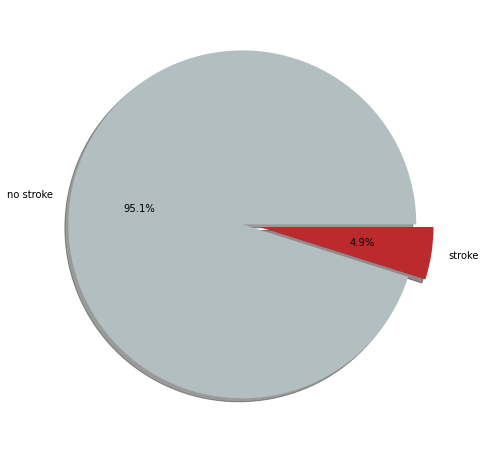

In [14]:
pie_df=pd.DataFrame(data.groupby('stroke')['stroke'].count()) #Checking the percentages of stroke and no-stroke 
plt.figure(figsize=(8,8))
pie_df
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
plt.show()



```
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
```
Logic of this code above ?



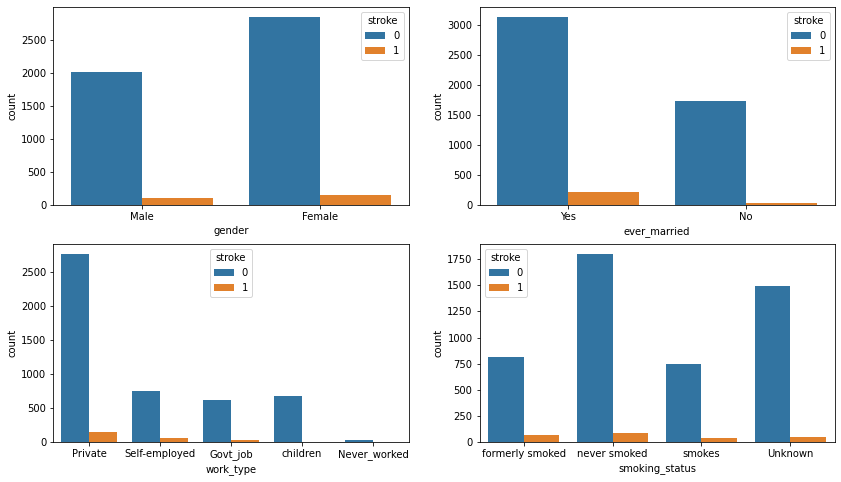

In [15]:
#checking the sum of each categorical feature

fig, ((ax1, ax2) ,(ax3,ax4)) = plt.subplots(2,2, figsize=(14,8))
sns.countplot(data=data, x="gender", hue="stroke",ax=ax1)
sns.countplot(data=data, x="ever_married", hue="stroke",ax=ax2)
sns.countplot(data=data, x="work_type", hue="stroke",ax=ax3)
sns.countplot(data=data, x="smoking_status", hue="stroke",ax=ax4)

`hue` parameter in this case mean what ?

In [16]:
print(data.hypertension.value_counts(normalize=False))

0    4611
1     498
Name: hypertension, dtype: int64


In [17]:
print(data.heart_disease.value_counts(normalize=False))


0    4833
1     276
Name: heart_disease, dtype: int64


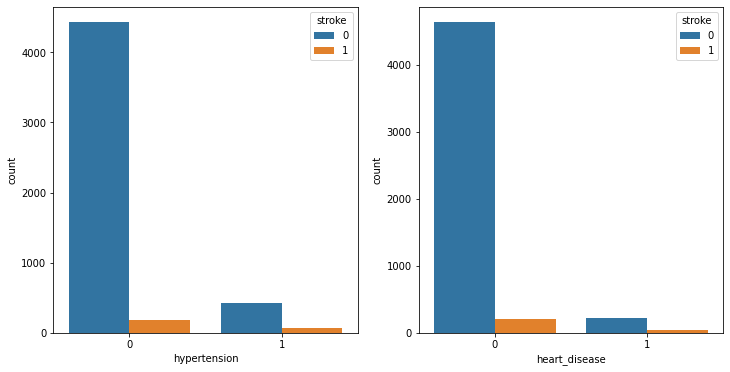

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=data, x="hypertension", hue="stroke",ax=ax1)
sns.countplot(data=data, x="heart_disease", hue="stroke",ax=ax2)

`hue` parameter in this case mean what ?

In [19]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric)

lb=LabelEncoder()

data['gender'] = lb.fit_transform(data['gender'])
data['ever_married'] = lb.fit_transform(data['ever_married'])
data['work_type'] = lb.fit_transform(data['work_type'])
data['Residence_type'] = lb.fit_transform(data['Residence_type'])
data['smoking_status'] = lb.fit_transform(data['smoking_status'])

data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


Why we must LabelEncoder ?

In [20]:
data.corr().style.background_gradient(cmap='GnBu')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.056576,-0.006105,0.054722,-0.025606,-0.062423,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.361686,0.014031,0.238323,0.325858,0.265165,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.051772,-0.007980,0.174540,0.160147,0.111018,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,-0.028031,0.003045,0.161907,0.038862,0.048445,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.352831,0.005988,0.155329,0.335563,0.259604,0.108299
work_type,0.056576,-0.361686,-0.051772,-0.028031,-0.352831,1.000000,-0.007348,-0.050492,-0.299495,-0.305942,-0.032323
Residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.007348,1.000000,-0.004783,-0.000288,0.008168,0.015415
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,-0.050492,-0.004783,1.000000,0.168910,0.063498,0.131991
bmi,-0.025606,0.325858,0.160147,0.038862,0.335563,-0.299495,-0.000288,0.168910,1.000000,0.219108,0.038912
smoking_status,-0.062423,0.265165,0.111018,0.048445,0.259604,-0.305942,0.008168,0.063498,0.219108,1.000000,0.028108


In [21]:
X = data.drop(['stroke'], axis=1).values  #Features
y = data['stroke'].values #target variable

In [22]:
from sklearn.preprocessing import StandardScaler   
# Standardize features by removing the mean and scaling to unit variance.
scalr=StandardScaler(copy=True,with_mean=True,with_std=True)
X=scalr.fit_transform(X)

`StandardScaler` is what ?